<a href="https://colab.research.google.com/github/JLC31/BrainTumorDetectionWithAugmentation/blob/main/Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation

**About the data:** <br>
The dataset contains 2 folders: yes and no which contains 253 Brain MRI Images. The folder yes contains 155 Brain MRI Images that are tumorous and the folder no contains 98 Brain MRI Images that are non-tumorous. You can find [here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection).

Since this is a small dataset, I used data augmentation in order to create more images.

Also, we could solve the data imbalance issue (since 61% of the data belongs to the tumorous class) using data augmentation.

## Import Necessary Modules

In [1]:
# !pip3 install timm
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import RandomZoom
from keras.utils import save_img
import cv2
import imutils
import matplotlib.pyplot as plt
from os import listdir
from torchvision import transforms
import time    
import random
import os
from PIL import Image
import numpy as np
import math



%matplotlib inline

In [2]:
# import the images from GitHub Repo
!rm -rf /content/BrainTumorDetectionWithAugmentation 
!git clone https://github.com/JLC31/BrainTumorDetectionWithAugmentation.git

Cloning into 'BrainTumorDetectionWithAugmentation'...
remote: Enumerating objects: 258, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 258 (delta 8), reused 146 (delta 4), pack-reused 97
Receiving objects: 100% (258/258), 9.70 MiB | 5.35 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [3]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s,1)}"

**Define the Augmentation Functions**

Baseline Data Augmentation

In [ ]:
def augment_data(file_dir, n_generated_samples, save_to_dir):
    """
    Arguments:
        file_dir: A string representing the directory where images that we want to augment are found.
        n_generated_samples: A string representing the number of generated samples using the given image.
        save_to_dir: A string representing the directory in which the generated images will be saved.
    """
    # this is the baseline augmentation
    data_gen = ImageDataGenerator(rotation_range=10, 
                                  width_shift_range=0.1, 
                                  height_shift_range=0.1, 
                                  shear_range=0.1, 
                                  brightness_range=(0.3, 1.0),
                                  horizontal_flip=True, 
                                  vertical_flip=True, 
                                  fill_mode='nearest'
                                 )

    
    for filename in listdir(file_dir):
        # load the image
        image = cv2.imread(file_dir + '/' + filename)
        # reshape the image
        image = image.reshape((1,)+image.shape)
        # prefix of the names for the generated sampels.
        save_prefix = 'aug_' + filename[:-4]
        # generate 'n_generated_samples' sample images
        i=0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, 
                                           save_prefix=save_prefix, save_format='jpg'):
            i += 1
            if i > n_generated_samples:
                break

Image Rotation

In [4]:
def image_rotation_aug(file_dir, n_generated_samples, save_to_dir):
    """
    Arguments:
        file_dir: A string representing the directory where images that we want to augment are found.
        n_generated_samples: A string representing the number of generated samples using the given image.
        save_to_dir: A string representing the directory in which the generated images will be saved.
    """
    # image rotation augmentation
    data_gen = ImageDataGenerator(rotation_range=45, 
                                  width_shift_range=0.1, 
                                  height_shift_range=0.1, 
                                  shear_range=0.1, 
                                  brightness_range=(0.0, 1.0),
                                  horizontal_flip=False, 
                                  vertical_flip=False, 
                                  fill_mode='nearest'
                                 )


    
    for filename in listdir(file_dir):
        # load the image
        image = cv2.imread(file_dir + '/' + filename)
        # reshape the image
        image = image.reshape((1,)+image.shape)
        # prefix of the names for the generated sampels.
        save_prefix = 'aug_' + filename[:-4]
        # generate 'n_generated_samples' sample images
        i=0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, 
                                           save_prefix=save_prefix, save_format='jpg'):
            i += 1

            if i > n_generated_samples:
                break

Random Zoom

In [ ]:
def random_zoom_aug(file_dir, n_generated_samples, save_to_dir):
    """
    Arguments:
        file_dir: A string representing the directory where images that we want to augment are found.
        n_generated_samples: A string representing the number of generated samples using the given image.
        save_to_dir: A string representing the directory in which the generated images will be saved.
    """
    # noise injection augmentation
    data_gen = tf.keras.layers.GaussianNoise(
    stddev, seed=None, **kwargs
)

    for filename in listdir(file_dir):
        # load the image
        image = cv2.imread(file_dir + '/' + filename)
        # reshape the image
        image = image.reshape((1,)+image.shape)
        # prefix of the names for the generated sampels.
        save_prefix = 'aug_' + filename[:-4]
        # generate 'n_generated_samples' sample images
        i=0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, 
                                           save_prefix=save_prefix, save_format='jpg'):
            i += 1
            if i > n_generated_samples:
                break

Gaussian Blur Augmentation





In [ ]:
def gblur_aug(file_dir, n_generated_samples, save_to_dir):
    """
    Arguments:
        file_dir: A string representing the directory where images that we want to augment are found.
        n_generated_samples: A string representing the number of generated samples using the given image.
        save_to_dir: A string representing the directory in which the generated images will be saved.
    """
    # noise injection augmentation
    for i in listdir(file_dir):
      # for each sample, need to augment 'n_generated_samples' number of times
      for j in range(n_generated_samples + 1):
        image = cv2.imread(file_dir + '/' + i)
        kernel_size = 21
        sigma = np.random.random() * 5
        print(sigma)
        image_blur = cv2.GaussianBlur(image, (kernel_size, kernel_size), 5)
        os.chdir(save_to_dir)

        cv2.imwrite(f"{i[:-4]}_aug_{j}.jpg", image_blur)

    # for filename in listdir(file_dir):
    #     # load the image
    #     image = cv2.imread(file_dir + '/' + filename)
    #     # reshape the image
    #     image = image.reshape((1,)+image.shape)
    #     # prefix of the names for the generated sampels.
    #     save_prefix = 'aug_' + filename[:-4]
    #     # generate 'n_generated_samples' sample images
    #     i=0
    #     for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, 
    #                                        save_prefix=save_prefix, save_format='jpg'):
    #         i += 1
    #         if i > n_generated_samples:
    #             break



Salt and Pepper Noise Injection

In [5]:
def salt_pep_aug(file_dir, n_generated_samples, save_to_dir):
    """
    Arguments:
        file_dir: A string representing the directory where images that we want to augment are found.
        n_generated_samples: A string representing the number of generated samples using the given image.
        save_to_dir: A string representing the directory in which the generated images will be saved.
    """
    # noise injection augmentation
    for i in listdir(file_dir):
      # for each sample, need to augment 'n_generated_samples' number of times
      for j in range(n_generated_samples + 1):
        image = cv2.imread(file_dir + '/' + i)
        image_noise = image.copy()
        image_noise[np.random.random(image.shape)>0.95] = 0
        image_noise[np.random.random(image.shape)>0.95] = 255
        os.chdir(save_to_dir)
        
        cv2.imwrite(f"{i[:-4]}_aug_{j}.jpg", image_noise)


Random Erasing

In [6]:
# driver eraser function from https://github.com/yu4u/cutout-random-erasing

def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        if input_img.ndim == 3:
            img_h, img_w, img_c = input_img.shape
        elif input_img.ndim == 2:
            img_h, img_w = input_img.shape

        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            if input_img.ndim == 3:
                c = np.random.uniform(v_l, v_h, (h, w, img_c))
            if input_img.ndim == 2:
                c = np.random.uniform(v_l, v_h, (h, w))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w] = c

        return input_img

    return eraser

def erase_aug(file_dir, n_generated_samples, save_to_dir):

    data_gen = ImageDataGenerator(preprocessing_function=get_random_eraser(v_l=0, v_h=1), rotation_range=0, 
                                  width_shift_range=0, 
                                  height_shift_range=0, 
                                  shear_range=0, 
                                  brightness_range=(0.0, 1.0),
                                  horizontal_flip=False, 
                                  vertical_flip=False, 
                                  fill_mode='nearest'
                                 )


    for filename in listdir(file_dir):
        # load the image
        image = cv2.imread(file_dir + '/' + filename)
        # reshape the image
        image = image.reshape((1,)+image.shape)
        # prefix of the names for the generated sampels.
        save_prefix = 'aug_' + filename[:-4]
        # generate 'n_generated_samples' sample images
        i=0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, 
                                           save_prefix=save_prefix, save_format='jpg'):
            i += 1

            if i > n_generated_samples:
                break
        


        #  cv2.imwrite(f"{i}_aug_{j}.jpg", image)

Remember that 61% of the data (155 images) are tumorous. And, 39% of the data (98 images) are non-tumorous.<br>
So, in order to balance the data we can generate 9 new images for every image that belongs to 'no' class and 6 images for every image that belongs the 'yes' class.<br>

**Time to Fetch the Augmented Data**

IMPORTANT: Make sure you do not run each of these cells during the same runtime. RAM limitations in CoLab will prevent you from building the model. Only choose to run one of the below augmentations.

- Baseline Augmentation Initialization

In [ ]:
start_time = time.time()

starting_path = "/content/BrainTumorDetectionWithAugmentation"
augmented_data_path = starting_path + '/augmented data'

# augment data for the examples with label equal to 'yes' representing tumurous examples
augment_data(file_dir=starting_path+'/yes', n_generated_samples=6, save_to_dir=augmented_data_path+'/yes')
# augment data for the examples with label equal to 'no' representing non-tumurous examples
augment_data(file_dir=starting_path+'/no', n_generated_samples=9, save_to_dir=augmented_data_path+'/no')

# need to specify which path we will be referring to later when viewing/manipulating the augmented data
final_path = augmented_data_path

end_time = time.time()
execution_time = (end_time - start_time)

print(f"Elapsed time: {hms_string(execution_time)}")

NameError: ignored

- Image Rotation Augmentation Initialization

In [7]:
start_time = time.time()

# run once to initialize directories for this augmentation, need them to be able to work later with the files we create
!rm -rf /content/BrainTumorDetectionWithAugmentation/gblur_augmented_data
!mkdir -p /content/BrainTumorDetectionWithAugmentation/image_rotation_augmented_data
!mkdir -p /content/BrainTumorDetectionWithAugmentation/image_rotation_augmented_data/yes
!mkdir -p /content/BrainTumorDetectionWithAugmentation/image_rotation_augmented_data/no

starting_path = "/content/BrainTumorDetectionWithAugmentation"
rotation_data_path = "/content/BrainTumorDetectionWithAugmentation/image_rotation_augmented_data"

image_rotation_aug(file_dir=starting_path+'/yes', n_generated_samples=6, save_to_dir=rotation_data_path+'/yes')
image_rotation_aug(file_dir=starting_path+'/no', n_generated_samples=9, save_to_dir=rotation_data_path+'/no')

final_path = rotation_data_path

end_time = time.time()
execution_time = (end_time - start_time)

print(f"Elapsed time: {hms_string(execution_time)}")

Elapsed time: 0:1:30.8


- Random Zoom Augmentation Initialization

In [ ]:
start_time = time.time()

# run once to initialize directories for this augmentation, need them to be able to work later with the files we create
!rm -rf /content/BrainTumorDetectionWithAugmentation/rzoom_augmented_data
!mkdir -p /content/BrainTumorDetectionWithAugmentation/rzoom_augmented_data
!mkdir -p /content/BrainTumorDetectionWithAugmentation/rzoom_augmented_data/yes
!mkdir -p /content/BrainTumorDetectionWithAugmentation/rzoom_augmented_data/no

starting_path = "/content/BrainTumorDetectionWithAugmentation"
rzoom_data_path = "/content/BrainTumorDetectionWithAugmentation/rzoom_augmented_data"

random_zoom_aug(file_dir=starting_path+'/yes', n_generated_samples=6, save_to_dir=rzoom_data_path+'/yes')
random_zoom_aug(file_dir=starting_path+'/no', n_generated_samples=9, save_to_dir=rzoom_data_path+'/no')

final_path = rzoom_data_path

end_time = time.time()
execution_time = (end_time - start_time)

print(f"Elapsed time: {hms_string(execution_time)}")

NameError: ignored

Gaussian Blur Augmentation Initialization

In [ ]:
start_time = time.time()

# run once to initialize directories for this augmentation, need them to be able to work later with the files we create
!rm -rf /content/BrainTumorDetectionWithAugmentation/gblur_augmented_data
!mkdir -p /content/BrainTumorDetectionWithAugmentation/gblur_augmented_data
!mkdir -p /content/BrainTumorDetectionWithAugmentation/gblur_augmented_data/yes
!mkdir -p /content/BrainTumorDetectionWithAugmentation/gblur_augmented_data/no

starting_path = "/content/BrainTumorDetectionWithAugmentation"
gblur_data_path = "/content/BrainTumorDetectionWithAugmentation/gblur_augmented_data"

gblur_aug(file_dir=starting_path+'/yes', n_generated_samples=6, save_to_dir=gblur_data_path+'/yes')
gblur_aug(file_dir=starting_path+'/no', n_generated_samples=9, save_to_dir=gblur_data_path+'/no')

final_path = gblur_data_path

end_time = time.time()
execution_time = (end_time - start_time)

print(f"Elapsed time: {hms_string(execution_time)}")

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
3.3983049124269775
1.4156657313151149
3.975758240633676
2.2657312006381733
0.31721255628426925
3.913020261062074
0.42666240284632506
1.0779412351490096
3.6864741540333243
2.700137417857977
4.024935222538838
1.425215449077986
0.8667021090528276
0.6878458339182042
0.04654566886591105
1.15335817823417
3.265277013825625
1.0303246463957167
2.721162734502574
1.339017585067452
1.7645154888327035
2.6641101887767915
0.2218824537623959
4.441306390080116
1.1316746312121069
4.433590338089424
2.068984767313738
3.963530381689966
3.5530375795802187
4.780661473443307
3.2396780332363537
2.9607825947055626
3.7276796327794544
0.40802069332210644
2.109845196186243

Salt and Pepper Noise Augmentation Initialization

In [8]:
start_time = time.time()

# run once to initialize directories for this augmentation, need them to be able to work later with the files we create
!rm -rf /content/BrainTumorDetectionWithAugmentation/spnoise_augmented_data
!mkdir -p /content/BrainTumorDetectionWithAugmentation/spnoise_augmented_data
!mkdir -p /content/BrainTumorDetectionWithAugmentation/spnoise_augmented_data/yes
!mkdir -p /content/BrainTumorDetectionWithAugmentation/spnoise_augmented_data/no

starting_path = "/content/BrainTumorDetectionWithAugmentation"
spnoise_data_path = "/content/BrainTumorDetectionWithAugmentation/spnoise_augmented_data"

# for second augmentation:
salt_pep_aug(file_dir=rotation_data_path+'/yes', n_generated_samples=0, save_to_dir=spnoise_data_path+'/yes')
salt_pep_aug(file_dir=rotation_data_path+'/no', n_generated_samples=0, save_to_dir=spnoise_data_path+'/no')


# salt_pep_aug(file_dir=starting_path+'/yes', n_generated_samples=6, save_to_dir=spnoise_data_path+'/yes')
# salt_pep_aug(file_dir=starting_path+'/no', n_generated_samples=9, save_to_dir=spnoise_data_path+'/no')

final_path = spnoise_data_path

end_time = time.time()
execution_time = (end_time - start_time)

print(f"Elapsed time: {hms_string(execution_time)}")

Elapsed time: 0:0:47.2


Random Erasing Augmentation Initialization

In [9]:
start_time = time.time()

# run once to initialize directories for this augmentation, need them to be able to work later with the files we create
!rm -rf /content/BrainTumorDetectionWithAugmentation/erase_augmented_data
!mkdir -p /content/BrainTumorDetectionWithAugmentation/erase_augmented_data
!mkdir -p /content/BrainTumorDetectionWithAugmentation/erase_augmented_data/yes
!mkdir -p /content/BrainTumorDetectionWithAugmentation/erase_augmented_data/no

# starting_path = "/content/BrainTumorDetectionWithAugmentation"
# second_aug_rotation_first_path = rotation_data_path
erase_data_path = "/content/BrainTumorDetectionWithAugmentation/erase_augmented_data"

erase_aug(file_dir=spnoise_data_path+'/yes', n_generated_samples=0, save_to_dir=erase_data_path+'/yes')
erase_aug(file_dir=spnoise_data_path+'/no', n_generated_samples=0, save_to_dir=erase_data_path+'/no')

# if spnoise_data_path == True:
#   erase_aug(file_dir=starting_path+'/yes', n_generated_samples=6, save_to_dir=spnoise_data_path+'/yes')

# erase_aug(file_dir=starting_path+'/yes', n_generated_samples=6, save_to_dir=erase_data_path+'/yes')
# erase_aug(file_dir=starting_path+'/no', n_generated_samples=9, save_to_dir=erase_data_path+'/no')

final_path = erase_data_path

end_time = time.time()
execution_time = (end_time - start_time)

print(f"Elapsed time: {hms_string(execution_time)}")

Elapsed time: 0:0:36.4


In [ ]:
start_time = time.time()

starting_path = "/content/BrainTumorDetectionWithAugmentation"

# this augmented data is the original, this is the one with just rotations/vertical&horizontal flip/brightness change
augmented_data_path = starting_path + '/augmented data'

# function to be used for image rotation

# run once to initialize directories for this augmentation
!mkdir -p /content/BrainTumorDetectionWithAugmentation/image_rotation_augmented_data
!mkdir -p /content/BrainTumorDetectionWithAugmentation/image_rotation_augmented_data/yes
!mkdir -p /content/BrainTumorDetectionWithAugmentation/image_rotation_augmented_data/no

rotation_data_path = "/content/BrainTumorDetectionWithAugmentation/image_rotation_augmented_data"

image_rotation_aug(file_dir=starting_path+'/yes', n_generated_samples=6, save_to_dir=rotation_data_path+'/yes')
image_rotation_aug(file_dir=starting_path+'/no', n_generated_samples=9, save_to_dir=rotation_data_path+'/no')

# function to be used for noise injection

# https://www.tensorflow.org/api_docs/python/tf/keras/layers/GaussianNoise

# function to be used for cropping

# https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomCrop

# function to be used for random erasing

# https://www.tensorflow.org/api_docs/python/tfm/vision/augment/RandomErasing

# augment data for the examples with label equal to 'yes' representing tumurous examples
augment_data(file_dir=starting_path+'/yes', n_generated_samples=6, save_to_dir=augmented_data_path+'/yes')
# augment data for the examples with label equal to 'no' representing non-tumurous examples
augment_data(file_dir=starting_path+'/no', n_generated_samples=9, save_to_dir=augmented_data_path+'/no')

end_time = time.time()
execution_time = (end_time - start_time)

# erase blank.txt file that was used to initialize the repo (run once)
!rm "/content/BrainTumorDetectionWithAugmentation/augmented data/yes/blank.txt"
!rm "/content/BrainTumorDetectionWithAugmentation/augmented data/no/blank.txt"

print(f"Elapsed time: {hms_string(execution_time)}")

Elapsed time: 0:1:18.6


Let's see how many tumorous and non-tumorous examples after performing data augmentation:

In [10]:
def data_summary(main_path):
    
    yes_path = main_path+'/yes'
    no_path = main_path+'/no'
        
    # number of files (images) that are in the the folder named 'yes' that represent tumorous (positive) examples
    m_pos = len(listdir(yes_path))
    # number of files (images) that are in the the folder named 'no' that represent non-tumorous (negative) examples
    m_neg = len(listdir(no_path))
    # number of all examples
    m = (m_pos+m_neg)
    
    pos_prec = (m_pos* 100.0)/ m
    neg_prec = (m_neg* 100.0)/ m
    
    print(f"Number of examples: {m}")
    print(f"Percentage of positive examples: {pos_prec}%, number of pos examples: {m_pos}") 
    print(f"Percentage of negative examples: {neg_prec}%, number of neg examples: {m_neg}") 

In [11]:
# prints out the number of positive and negative examples (should be near a 50/50 split)

# data_summary(augmented_data_path)
data_summary(final_path)

Number of examples: 2064
Percentage of positive examples: 52.56782945736434%, number of pos examples: 1085
Percentage of negative examples: 47.43217054263566%, number of neg examples: 979


# Brain Tumor Detection Using a Convolutional Neural Network

**About the Brain MRI Images dataset:**<br>
The dataset contains 2 folders: yes and no which contains 253 Brain MRI Images. The folder yes contains 155 Brain MRI Images that are tumorous and the folder no contains 98 Brain MRI Images that are non-tumorous. You can find it [here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection).

## Import Necessary Modules

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

%matplotlib inline

## Data Preparation & Preprocessing

In order to crop the part that contains only the brain of the image, I used a cropping technique to find the extreme top, bottom, left and right points of the brain. You can read more about it here [Finding extreme points in contours with OpenCV](https://www.pyimagesearch.com/2016/04/11/finding-extreme-points-in-contours-with-opencv/).

In [13]:
def crop_brain_contour(image, plot=False):
    
    #import imutils
    #import cv2
    #from matplotlib import pyplot as plt
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image

In order to better understand what it's doing, let's grab an image from the dataset and apply this cropping function to see the result:

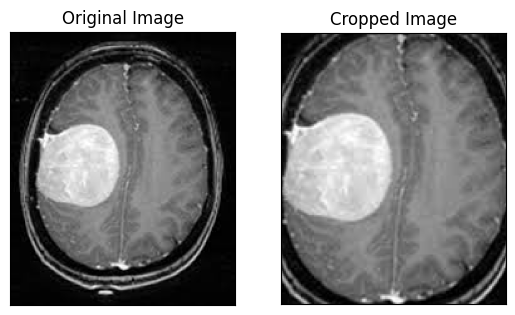

In [14]:
ex_img = cv2.imread(starting_path+'/yes/Y1.jpg')
ex_new_img = crop_brain_contour(ex_img, True)

### Load up the data:

The following function takes two arguments, the first one is a list of directory paths for the folders 'yes' and 'no' that contain the image data and the second argument is the image size, and for every image in both directories and does the following: 
1. Read the image.
2. Crop the part of the image representing only the brain.
3. Resize the image (because the images in the dataset come in different sizes (meaning width, height and # of channels). So, we want all of our images to be (240, 240, 3) to feed it as an input to the neural network.
4. Apply normalization because we want pixel values to be scaled to the range 0-1.
5. Append the image to <i>X</i> and its label to <i>y</i>.<br>

After that, Shuffle <i>X</i> and <i>y</i>, because the data is ordered (meaning the arrays contains the first part belonging to one class and the second part belonging to the other class, and we don't want that).<br>
Finally, Return <i>X</i> and <i>y</i>.

In [15]:
def load_data(dir_list, image_size):
    """
    Read images, resize and normalize them. 
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size
    
    for directory in dir_list:
        for filename in listdir(directory):
            try:
                # load the image
                image = cv2.imread(directory + '/' + filename)
                # crop the brain and ignore the unnecessary rest part of the image
                image = crop_brain_contour(image, plot=False)
                # resize image
                image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
                # normalize values
                image = image / 255.
                # convert image to numpy array and append it to X
                X.append(image)
                # append a value of 1 to the target array if the image
                # is in the folder named 'yes', otherwise append 0.
                if directory[-3:] == 'yes':
                    y.append([1])
                else:
                    y.append([0])
            except ValueError:
                pass
                
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    X, y = shuffle(X, y)
    
    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    
    return X, y

Load up the data that we augmented earlier in the Data Augmentation notebook.<br>
**Note:** the augmented data directory contains not only the new generated images but also the original images.

In [16]:
augmented_path = 'augmented data/'
# rotation_data_path = "/content/BrainTumorDetectionWithAugmentation/image_rotation_augmented_data"

# augmented data (yes and no) contains both the original and the new generated examples
# augmented_yes = augmented_path + '/yes' 
# augmented_no = augmented_path + '/no'

# rotation_yes = rotation_data_path + '/yes'
# rotation_no = rotation_data_path + '/no'

# noise_yes = noise_data_path + '/yes'
# noise_no = noise_data_path + '/no'

# spnoise_yes = spnoise_data_path + '/yes'
# spnoise_no = spnoise_data_path + '/no'

# gblur_yes = gblur_data_path + '/yes'
# gblur_no = gblur_data_path + '/no'

rand_erase_yes = erase_data_path + '/yes'
rand_erase_no = erase_data_path + '/no'



IMG_WIDTH, IMG_HEIGHT = (240, 240)

# load the data
# X, y = load_data([augmented_yes, augmented_no], (IMG_WIDTH, IMG_HEIGHT))
# X, y = load_data([rotation_yes, rotation_no], (IMG_WIDTH, IMG_HEIGHT))
# X, y = load_data([noise_yes, noise_no], (IMG_WIDTH, IMG_HEIGHT))
X, y = load_data([rand_erase_yes, rand_erase_no], (IMG_WIDTH, IMG_HEIGHT))
# X, y = load_data([spnoise_yes, spnoise_no], (IMG_WIDTH, IMG_HEIGHT))


Number of examples is: 2054
X shape is: (2054, 240, 240, 3)
y shape is: (2054, 1)


As we see, we have 2065 images. Each images has a shape of **(240, 240, 3)=(image_width, image_height, number_of_channels)**

### Plot sample images:

In [17]:
def plot_sample_images(X, y, n=50):
    """
    Plots n sample images for both values of y (labels).
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """
    
    for label in [0,1]:
        # grab the first n images with the corresponding y values equal to label
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1 # current plot        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            # remove ticks
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                           labelbottom=False, labeltop=False, labelleft=False, labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

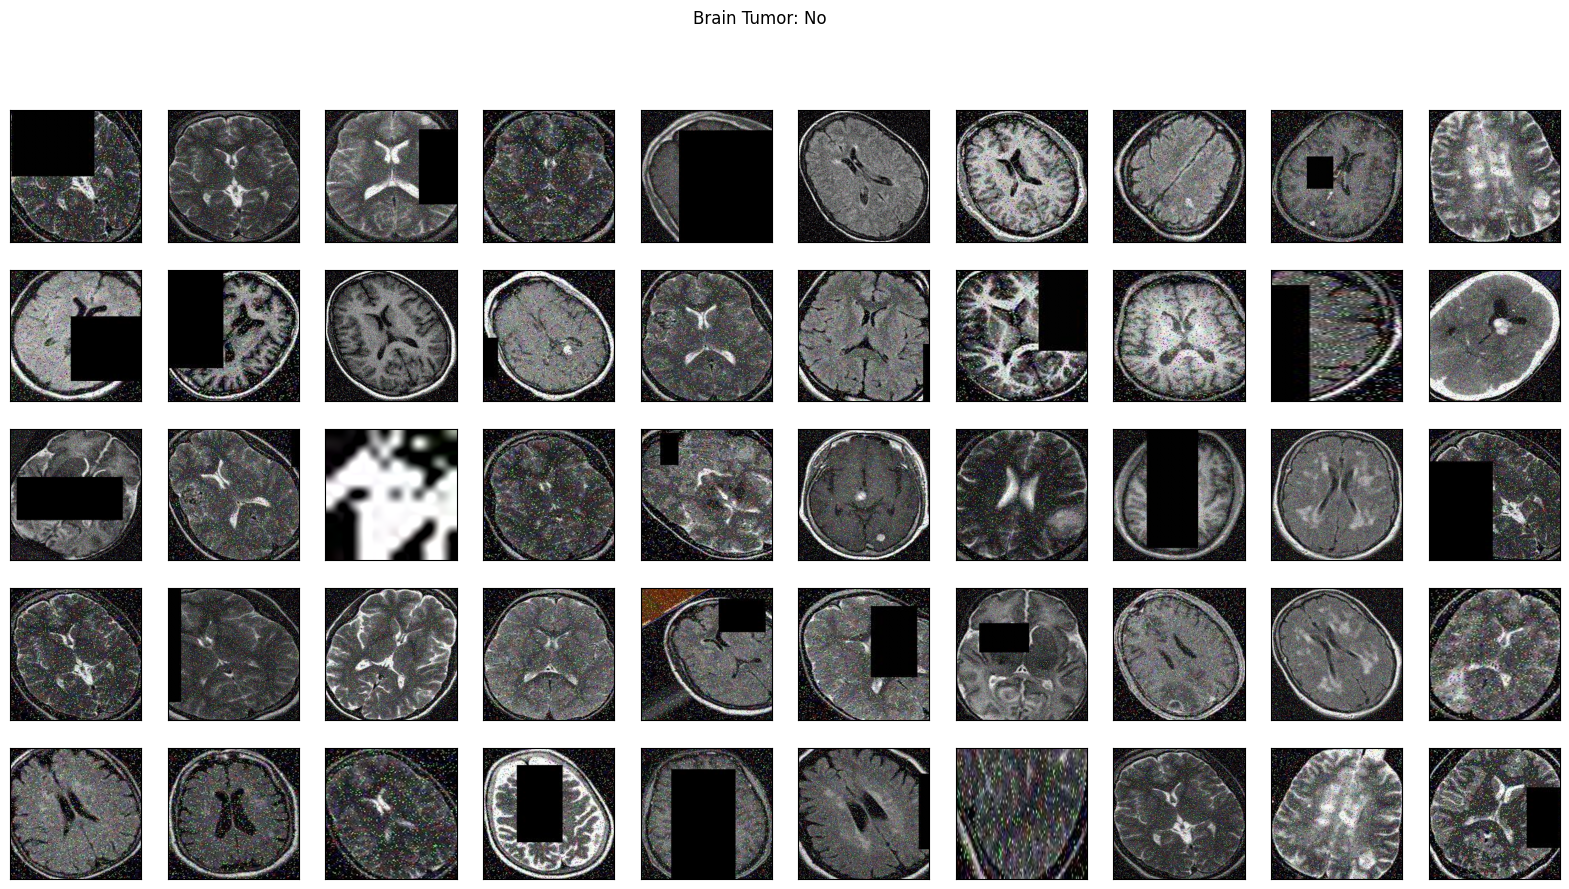

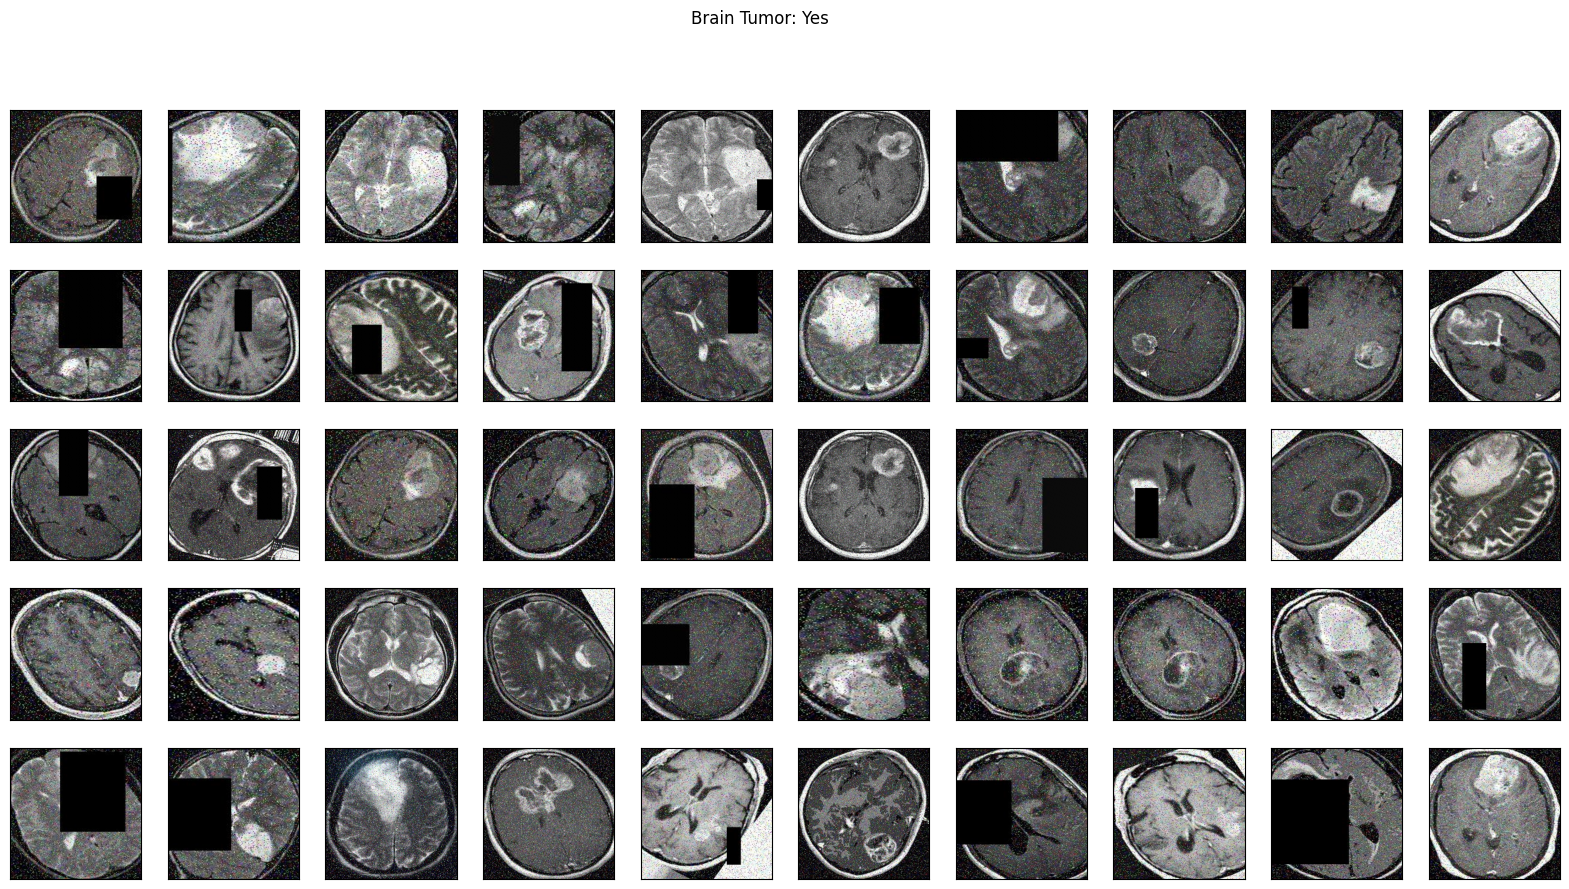

In [18]:
plot_sample_images(X, y)

### Split the data:
Split <i>X</i> and <i>y</i> into training, validation (development) and validation sets.

In [19]:
def split_data(X, y, test_size=0.2):
       
    """
    Splits data into training, development and test sets.
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    Returns:
        X_train: A numpy array with shape = (#_train_examples, image_width, image_height, #_channels)
        y_train: A numpy array with shape = (#_train_examples, 1)
        X_val: A numpy array with shape = (#_val_examples, image_width, image_height, #_channels)
        y_val: A numpy array with shape = (#_val_examples, 1)
        X_test: A numpy array with shape = (#_test_examples, image_width, image_height, #_channels)
        y_test: A numpy array with shape = (#_test_examples, 1)
    """
    
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

Let's use the following way to split:<br>
1. 70% of the data for training.
2. 15% of the data for validation.
3. 15% of the data for testing.

In [20]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, test_size=0.3)

In [21]:
del X,y

In [22]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of development examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_val (dev) shape: " + str(X_val.shape))
print ("Y_val (dev) shape: " + str(y_val.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 1437
number of development examples = 309
number of test examples = 308
X_train shape: (1437, 240, 240, 3)
Y_train shape: (1437, 1)
X_val (dev) shape: (309, 240, 240, 3)
Y_val (dev) shape: (309, 1)
X_test shape: (308, 240, 240, 3)
Y_test shape: (308, 1)


Some helper functions:

In [23]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s,1)}"

In [24]:
def compute_f1_score(y_true, prob):
    # convert the vector of probabilities to a target vector
    y_pred = np.where(prob > 0.5, 1, 0)
    
    score = f1_score(y_true, y_pred)
    
    return score

# Build the model

Let's build a convolutional neural network model:

<img src='convnet_architecture.jpg'>

In [25]:
def build_model(input_shape):
    """
    Arugments:
        input_shape: A tuple representing the shape of the input of the model. shape=(image_width, image_height, #_channels)
    Returns:
        model: A Model object.
    """
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = Input(input_shape) # shape=(?, 240, 240, 3)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((2, 2))(X_input) # shape=(?, 244, 244, 3)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X) # shape=(?, 238, 238, 32)
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool0')(X) # shape=(?, 59, 59, 32) 
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool1')(X) # shape=(?, 14, 14, 32)
    
    # FLATTEN X 
    X = Flatten()(X) # shape=(?, 6272)
    # FULLYCONNECTED
    X = Dense(1, activation='sigmoid', name='fc')(X) # shape=(?, 1)
    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='BrainDetectionModel')
    
    return model

Define the image shape:

In [26]:
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)

In [27]:
model = build_model(IMG_SHAPE)

In [28]:
model.summary()

Model: "BrainDetectionModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 244, 244, 3)      0         
 2D)                                                             
                                                                 
 conv0 (Conv2D)              (None, 238, 238, 32)      4736      
                                                                 
 bn0 (BatchNormalization)    (None, 238, 238, 32)      128       
                                                                 
 activation (Activation)     (None, 238, 238, 32)      0         
                                                                 
 max_pool0 (MaxPooling2D)    (None, 59, 59, 32)        0         
                                               

Compile the model:

In [29]:
# model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# run once to initialize the creation of the models directory
# !rm -rf /content/BrainTumorDetectionWithAugmentation/models
!mkdir /content/BrainTumorDetectionWithAugmentation/models

In [31]:
# checkpoint
# unique file name that will include the epoch and the validation (development) accuracy
filepath="cnn-parameters-improvement-{epoch:02d}-{val_accuracy:.2f}"
# save the model with the best validation (development) accuracy till now
checkpoint = ModelCheckpoint("/content/BrainTumorDetectionWithAugmentation/models/{}.model".format(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max'))
# print("/content/BrainTumorDetectionWithAugmentation/models/{}.model".format(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max'))

## Train the model

In [32]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=24, validation_data=(X_val, y_val), callbacks=[checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/24
45/45 [==============================] - ETA: 0s - loss: 1.1869 - accuracy: 0.5261

45/45 [==============================] - 139s 3s/step - loss: 1.1869 - accuracy: 0.5261 - val_loss: 0.7253 - val_accuracy: 0.5113
Epoch 2/24
45/45 [==============================] - ETA: 0s - loss: 0.6411 - accuracy: 0.6569

45/45 [==============================] - 139s 3s/step - loss: 0.6411 - accuracy: 0.6569 - val_loss: 0.6428 - val_accuracy: 0.6699
Epoch 3/24
45/45 [==============================] - ETA: 0s - loss: 0.5675 - accuracy: 0.7098

45/45 [==============================] - 134s 3s/step - loss: 0.5675 - accuracy: 0.7098 - val_loss: 0.6848 - val_accuracy: 0.5307
Epoch 4/24
45/45 [==============================] - ETA: 0s - loss: 0.5229 - accuracy: 0.7383

45/45 [==============================] - 141s 3s/step - loss: 0.5229 - accuracy: 0.7383 - val_loss: 0.7817 - val_accuracy: 0.4887
Epoch 5/24
45/45 [==============================] - ETA: 0s - loss: 0.5025 - accuracy: 0.7606

45/45 [==============================] - 136s 3s/step - loss: 0.5025 - accuracy: 0.7606 - val_loss: 0.7287 - val_accuracy: 0.5307
Epoch 6/24
45/45 [==============================] - ETA: 0s - loss: 0.4484 - accuracy: 0.7850

45/45 [==============================] - 140s 3s/step - loss: 0.4484 - accuracy: 0.7850 - val_loss: 0.9752 - val_accuracy: 0.4854
Epoch 7/24
45/45 [==============================] - ETA: 0s - loss: 0.4551 - accuracy: 0.7954

45/45 [==============================] - 136s 3s/step - loss: 0.4551 - accuracy: 0.7954 - val_loss: 0.5421 - val_accuracy: 0.7573
Epoch 8/24
45/45 [==============================] - ETA: 0s - loss: 0.4224 - accuracy: 0.7961

45/45 [==============================] - 144s 3s/step - loss: 0.4224 - accuracy: 0.7961 - val_loss: 0.5831 - val_accuracy: 0.7087
Epoch 9/24
45/45 [==============================] - ETA: 0s - loss: 0.4279 - accuracy: 0.7905

45/45 [==============================] - 141s 3s/step - loss: 0.4279 - accuracy: 0.7905 - val_loss: 0.5409 - val_accuracy: 0.7249
Epoch 10/24
45/45 [==============================] - ETA: 0s - loss: 0.4336 - accuracy: 0.7843

45/45 [==============================] - 142s 3s/step - loss: 0.4336 - accuracy: 0.7843 - val_loss: 0.6738 - val_accuracy: 0.6408
Epoch 11/24
45/45 [==============================] - ETA: 0s - loss: 0.3560 - accuracy: 0.8427

45/45 [==============================] - 142s 3s/step - loss: 0.3560 - accuracy: 0.8427 - val_loss: 0.6080 - val_accuracy: 0.6731
Epoch 12/24
45/45 [==============================] - ETA: 0s - loss: 0.3943 - accuracy: 0.8184

45/45 [==============================] - 140s 3s/step - loss: 0.3943 - accuracy: 0.8184 - val_loss: 0.4978 - val_accuracy: 0.7540
Epoch 13/24
45/45 [==============================] - ETA: 0s - loss: 0.3527 - accuracy: 0.8399

45/45 [==============================] - 150s 3s/step - loss: 0.3527 - accuracy: 0.8399 - val_loss: 0.5380 - val_accuracy: 0.7282
Epoch 14/24
45/45 [==============================] - ETA: 0s - loss: 0.3437 - accuracy: 0.8427

45/45 [==============================] - 143s 3s/step - loss: 0.3437 - accuracy: 0.8427 - val_loss: 0.4708 - val_accuracy: 0.7411
Epoch 15/24
45/45 [==============================] - ETA: 0s - loss: 0.3497 - accuracy: 0.8462

45/45 [==============================] - 139s 3s/step - loss: 0.3497 - accuracy: 0.8462 - val_loss: 1.0355 - val_accuracy: 0.6246
Epoch 16/24
45/45 [==============================] - ETA: 0s - loss: 0.3690 - accuracy: 0.8309

45/45 [==============================] - 141s 3s/step - loss: 0.3690 - accuracy: 0.8309 - val_loss: 0.5261 - val_accuracy: 0.7443
Epoch 17/24
45/45 [==============================] - ETA: 0s - loss: 0.2867 - accuracy: 0.8873

45/45 [==============================] - 140s 3s/step - loss: 0.2867 - accuracy: 0.8873 - val_loss: 0.4744 - val_accuracy: 0.7670
Epoch 18/24
45/45 [==============================] - ETA: 0s - loss: 0.3065 - accuracy: 0.8692

45/45 [==============================] - 143s 3s/step - loss: 0.3065 - accuracy: 0.8692 - val_loss: 0.4864 - val_accuracy: 0.7605
Epoch 19/24
45/45 [==============================] - ETA: 0s - loss: 0.2849 - accuracy: 0.8859

45/45 [==============================] - 142s 3s/step - loss: 0.2849 - accuracy: 0.8859 - val_loss: 0.7291 - val_accuracy: 0.7152
Epoch 20/24
45/45 [==============================] - ETA: 0s - loss: 0.2893 - accuracy: 0.8733

45/45 [==============================] - 141s 3s/step - loss: 0.2893 - accuracy: 0.8733 - val_loss: 0.5131 - val_accuracy: 0.7638
Epoch 21/24
45/45 [==============================] - ETA: 0s - loss: 0.2541 - accuracy: 0.9033

45/45 [==============================] - 140s 3s/step - loss: 0.2541 - accuracy: 0.9033 - val_loss: 0.4827 - val_accuracy: 0.7508
Epoch 22/24
45/45 [==============================] - ETA: 0s - loss: 0.2311 - accuracy: 0.9074

45/45 [==============================] - 138s 3s/step - loss: 0.2311 - accuracy: 0.9074 - val_loss: 0.4790 - val_accuracy: 0.7767
Epoch 23/24
45/45 [==============================] - ETA: 0s - loss: 0.2748 - accuracy: 0.8859

45/45 [==============================] - 142s 3s/step - loss: 0.2748 - accuracy: 0.8859 - val_loss: 0.5074 - val_accuracy: 0.7605
Epoch 24/24
45/45 [==============================] - ETA: 0s - loss: 0.2375 - accuracy: 0.9040

45/45 [==============================] - 142s 3s/step - loss: 0.2375 - accuracy: 0.9040 - val_loss: 0.4643 - val_accuracy: 0.7540
Elapsed time: 0:56:17.0


Let's train for a few more epochs:

In [ ]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=3, validation_data=(X_val, y_val), callbacks=[checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/3
45/45 [==============================] - ETA: 0s - loss: 0.0800 - accuracy: 0.9847

45/45 [==============================] - 166s 4s/step - loss: 0.0800 - accuracy: 0.9847 - val_loss: 0.2725 - val_accuracy: 0.8835
Epoch 2/3
45/45 [==============================] - ETA: 0s - loss: 0.0703 - accuracy: 0.9819

45/45 [==============================] - 169s 4s/step - loss: 0.0703 - accuracy: 0.9819 - val_loss: 0.2036 - val_accuracy: 0.9320
Epoch 3/3
45/45 [==============================] - ETA: 0s - loss: 0.0643 - accuracy: 0.9868

45/45 [==============================] - 164s 4s/step - loss: 0.0643 - accuracy: 0.9868 - val_loss: 0.2731 - val_accuracy: 0.9061
Elapsed time: 0:8:24.1


In [ ]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=3, validation_data=(X_val, y_val), callbacks=[checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/3
45/45 [==============================] - ETA: 0s - loss: 0.0645 - accuracy: 0.9805

45/45 [==============================] - 167s 4s/step - loss: 0.0645 - accuracy: 0.9805 - val_loss: 0.1854 - val_accuracy: 0.9223
Epoch 2/3
45/45 [==============================] - ETA: 0s - loss: 0.0408 - accuracy: 0.9958

45/45 [==============================] - 165s 4s/step - loss: 0.0408 - accuracy: 0.9958 - val_loss: 0.1721 - val_accuracy: 0.9288
Epoch 3/3
45/45 [==============================] - ETA: 0s - loss: 0.0339 - accuracy: 0.9958

45/45 [==============================] - 169s 4s/step - loss: 0.0339 - accuracy: 0.9958 - val_loss: 0.1804 - val_accuracy: 0.9320
Elapsed time: 0:8:22.7


In [ ]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=3, validation_data=(X_val, y_val), callbacks=[checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/3
45/45 [==============================] - ETA: 0s - loss: 0.0311 - accuracy: 0.9972

45/45 [==============================] - 171s 4s/step - loss: 0.0311 - accuracy: 0.9972 - val_loss: 0.1809 - val_accuracy: 0.9417
Epoch 2/3
45/45 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 0.9979

45/45 [==============================] - 166s 4s/step - loss: 0.0246 - accuracy: 0.9979 - val_loss: 0.1793 - val_accuracy: 0.9353
Epoch 3/3
45/45 [==============================] - ETA: 0s - loss: 0.0232 - accuracy: 0.9979

45/45 [==============================] - 166s 4s/step - loss: 0.0232 - accuracy: 0.9979 - val_loss: 0.1804 - val_accuracy: 0.9353
Elapsed time: 0:8:24.3


In [ ]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=5, validation_data=(X_val, y_val), callbacks=[checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/5
45/45 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.9979

45/45 [==============================] - 167s 4s/step - loss: 0.0231 - accuracy: 0.9979 - val_loss: 0.1702 - val_accuracy: 0.9417
Epoch 2/5
45/45 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9979

45/45 [==============================] - 169s 4s/step - loss: 0.0213 - accuracy: 0.9979 - val_loss: 0.1737 - val_accuracy: 0.9353
Epoch 3/5
45/45 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9986

45/45 [==============================] - 166s 4s/step - loss: 0.0182 - accuracy: 0.9986 - val_loss: 0.1702 - val_accuracy: 0.9288
Epoch 4/5
45/45 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9979

45/45 [==============================] - 169s 4s/step - loss: 0.0187 - accuracy: 0.9979 - val_loss: 0.1801 - val_accuracy: 0.9320
Epoch 5/5
45/45 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9979

45/45 [==============================] - 170s 4s/step - loss: 0.0165 - accuracy: 0.9979 - val_loss: 0.1897 - val_accuracy: 0.9320
Elapsed time: 0:14:24.7


In [33]:
history = model.history.history

In [34]:
for key in history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


## Plot Loss & Accuracy

In [35]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

**Note:** Since we trained the model using more than model.fit() function call, this made the history only contain the metric values of the epochs for the last call (which was for 5 epochs), so to plot the metric values across the whole process of trianing the model from the beginning, I had to grab the rest of the values. 

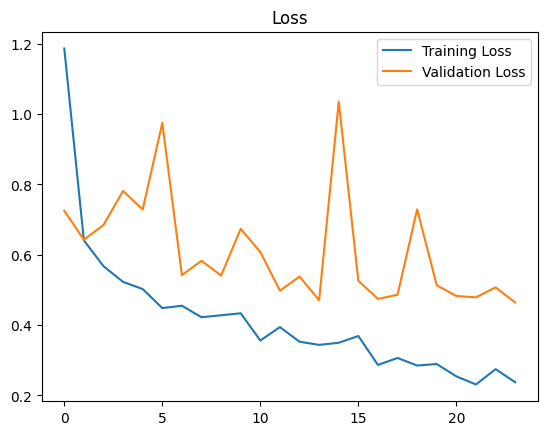

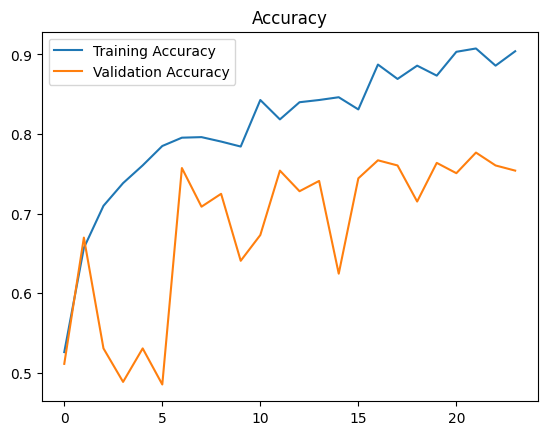

In [36]:
plot_metrics(history) 

# Results

Let's experiment with the best model (the one with the best validation accuracy):

Concretely, the model at the 23rd iteration with validation accuracy of 91%

### Load the best model

In [37]:
best_model = load_model(filepath='/content/BrainTumorDetectionWithAugmentation/models/cnn-parameters-improvement-22-0.78.model')

In [38]:
best_model.metrics_names

['loss', 'accuracy']

Evaluate the best model on the testing data:

In [39]:
loss, acc = best_model.evaluate(x=X_test, y=y_test)

10/10 [==============================] - 7s 654ms/step - loss: 0.5345 - accuracy: 0.7630


### Accuracy of the best model on the testing data:

In [40]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

Test Loss = 0.5344885587692261
Test Accuracy = 0.7629870176315308


### F1 score for the best model on the testing data:

In [41]:
y_test_prob = best_model.predict(X_test)

10/10 [==============================] - 7s 671ms/step


In [42]:
f1score = compute_f1_score(y_test, y_test_prob)
print(f"F1 score: {f1score}")

F1 score: 0.7739938080495357


Let's also find the f1 score on the validation 

In [43]:
y_val_prob = best_model.predict(X_val)

10/10 [==============================] - 8s 753ms/step


In [44]:

f1score_val = compute_f1_score(y_val, y_val_prob)
print(f"F1 score: {f1score_val}")

F1 score: 0.7836990595611285


### Results Interpretation

Let's remember the percentage of positive and negative examples:

In [45]:
def data_percentage(y):
    
    m=len(y)
    n_positive = np.sum(y)
    n_negative = m - n_positive
    
    pos_prec = (n_positive* 100.0)/ m
    neg_prec = (n_negative* 100.0)/ m
    
    print(f"Number of examples: {m}")
    print(f"Percentage of positive examples: {pos_prec}%, number of pos examples: {n_positive}") 
    print(f"Percentage of negative examples: {neg_prec}%, number of neg examples: {n_negative}") 



In [46]:
# the whole data
# data_percentage(y)

In [47]:
print("Training Data:")
data_percentage(y_train)
print("Validation Data:")
data_percentage(y_val)
print("Testing Data:")
data_percentage(y_test)

Training Data:
Number of examples: 1437
Percentage of positive examples: 52.609603340292274%, number of pos examples: 756
Percentage of negative examples: 47.390396659707726%, number of neg examples: 681
Validation Data:
Number of examples: 309
Percentage of positive examples: 52.103559870550164%, number of pos examples: 161
Percentage of negative examples: 47.896440129449836%, number of neg examples: 148
Testing Data:
Number of examples: 308
Percentage of positive examples: 53.246753246753244%, number of pos examples: 164
Percentage of negative examples: 46.753246753246756%, number of neg examples: 144


As expectred, the percentage of positive examples are around 50%.

# Conclusion:

#### Now, the model detects brain tumor with:<br>
**88.7%** accuracy on the **test set**.<br>
**0.88** f1 score on the **test set**.<br>
These resutls are very good considering that the data is balanced.

**Baseline Performance Table:**

| <!-- -->  | Validation set | Test set |
| --------- | -------------- | -------- |
| Accuracy  | 91%            | 89%      |
| F1 score  | 0.91           | 0.88     |

Image Rotation Performance Table:



| <!-- -->  | Validation set | Test set |
| --------- | -------------- | -------- |
| Accuracy  | 88%            | 88%      |
| F1 score  | 0.88           | 0.89     |

Salt and Pepper Noise Injection Performance Table:


| <!-- -->  | Validation set | Test set |
| --------- | -------------- | -------- |
| Accuracy  | 99.3%            | 98.8%      |
| F1 score  | 0.993           | 0.989     |

Random Erasing Performance Table:


| <!-- -->  | Validation set | Test set |
| --------- | -------------- | -------- |
| Accuracy  | 95.2%            | 94.5%      |
| F1 score  | 0.953           | 0.946    |

## Two Augmentations

Image Rotation & Random Erasing


| <!-- -->  | Validation set | Test set |
| --------- | -------------- | -------- |
| Accuracy  | 77.7%            | 75.7%      |
| F1 score  | 0.798           | 0.787    |

Image Rotation & Noise Injection


| <!-- -->  | Validation set | Test set |
| --------- | -------------- | -------- |
| Accuracy  | 83%            | 82%      |
| F1 score  | 0.833           | 0.834    |

Random Erasing & Noise Injection


| <!-- -->  | Validation set | Test set |
| --------- | -------------- | -------- |
| Accuracy  | 83%            | 82%      |
| F1 score  | 0.833           | 0.834    |

# 3 Augmentations


| <!-- -->  | Validation set | Test set |
| --------- | -------------- | -------- |
| Accuracy  | 78%            | 76%      |
| F1 score  | 0.78           | 0.77    |